In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [46]:
df=pd.read_csv(r"C:\\Users\Priyanshu Gupta\Desktop\machine learning\NLP\Project for determining toxic sentences\train.csv",delimiter=',',encoding='latin-1')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


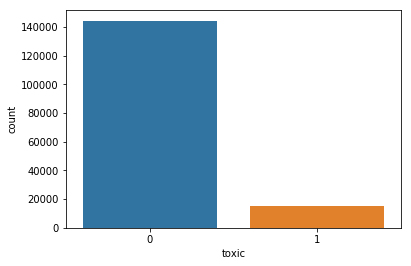

In [48]:
sns.countplot(df.toxic)


In [49]:
X_train=df.comment_text.values
Y_train=df[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].values

In [50]:
X_train.shape

(159571,)

In [51]:
Y_train.shape

(159571, 6)

In [52]:
max_words=13600
max_len=100
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences=tok.texts_to_sequences(X_train)

In [53]:

sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)
sequences

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985],
 [52,
  2635,
  13,
  555,
  3809,
  73,
  4556,
  2706,
  21,
  94,
  38,
  803,
  2679,
  992,
  589,
  8377,
  182],
 [412,
  437,
  73,
  134,
  14,
  249,
  2,
  71,
  314,
  78,
  50,
  9,
  13,
  626,
  8,
  2284,
  492,
  502,
  102,
  4,
  611,
  2,
  35,
  325,
  126,
  363,
  3,
  29,
  38,
  27,
  52,
  208,
  2,
  434,
  57,
  36,
  1,
  2394,
  93,
  1,
  737,
  468],
 [57,
  7,
  228,
  97,
  54,
  328,
  1436,
  15,
  2133,
  7,
  6024,
  22,
  1,
  123,
  2502,
  56,
  16,
  513,
  15,
  25,
  5,
  4236,
  3,
  1327,
  3,
  9762,
  7,
  67,
  1,
  277,
  85,
  122,
  13502,
  37,
  9,
  51,
  19,
  42,
  10,
  1,
  1460,
  138,
  1257,
  2153,
  426,
  1257,
  

In [54]:
sequences_matrix

array([[   0,    0,    0, ..., 4583, 2273,  985],
       [   0,    0,    0, ...,  589, 8377,  182],
       [   0,    0,    0, ...,    1,  737,  468],
       ...,
       [   0,    0,    0, ..., 8167, 3509, 4528],
       [   0,    0,    0, ...,  151,   34,   11],
       [   0,    0,    0, ..., 1627, 2056,   88]])

In [55]:
def RNN():
    inputs=Input(name='inputs',shape=[max_len])
    layer=Embedding(max_words,50,input_length=max_len)(inputs)
    layer=LSTM(64)(layer)
    layer=Dense(256,name='FC1')(layer)
    layer=Activation('relu')(layer)
    layer=Dropout(0.5)(layer)
    layer=Dense(6,name='out_layer')(layer)
    layer=Activation('sigmoid')(layer)
    model=Model(inputs=inputs,outputs=layer)
    return model

In [56]:
model=RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 50)           680000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 6)                 1542      
__________

In [57]:
history=model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 142s 1ms/step - loss: 0.0763 - acc: 0.9758 - val_loss: 0.0588 - val_acc: 0.9807
Epoch 2/10
127656/127656 [==============================] - 134s 1ms/step - loss: 0.0526 - acc: 0.9814 - val_loss: 0.0519 - val_acc: 0.9816
Epoch 3/10
127656/127656 [==============================] - 145s 1ms/step - loss: 0.0495 - acc: 0.9822 - val_loss: 0.0541 - val_acc: 0.9818


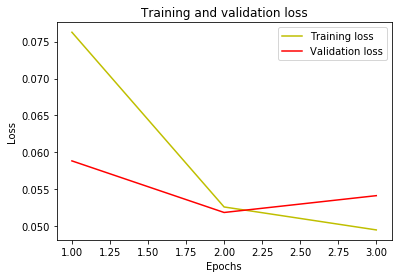

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
df1=pd.read_csv(r"C:\\Users\Priyanshu Gupta\Desktop\machine learning\NLP\Project for determining toxic sentences\test.csv",delimiter=',',encoding='latin-1')
df1.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [67]:
X_test=df1.comment_text.values
test_sequences=tok.texts_to_sequences(X_test)
test_sequences_matrix=sequence.pad_sequences(test_sequences,maxlen=max_len)
test_sequences_matrix.shape

(153164, 100)

In [68]:
Y_predicted=model.predict(test_sequences_matrix)

In [69]:
Y_predicted

array([[9.9581164e-01, 2.2794485e-01, 9.5118713e-01, 2.5587171e-02,
        8.4501004e-01, 1.2743092e-01],
       [3.8781762e-04, 0.0000000e+00, 3.3020973e-05, 0.0000000e+00,
        1.9073486e-05, 5.9604645e-07],
       [8.9797378e-04, 0.0000000e+00, 9.2267990e-05, 5.9604645e-08,
        6.2108040e-05, 3.1888485e-06],
       ...,
       [6.5040588e-04, 0.0000000e+00, 7.5787306e-05, 0.0000000e+00,
        4.1157007e-05, 1.4901161e-06],
       [3.7923455e-04, 0.0000000e+00, 3.0457973e-05, 0.0000000e+00,
        1.4662743e-05, 3.5762787e-07],
       [9.4959712e-01, 7.0323318e-02, 7.1686989e-01, 1.8172830e-02,
        6.0549593e-01, 8.5250854e-02]], dtype=float32)

In [70]:
df2=pd.read_csv(r"C:\\Users\Priyanshu Gupta\Desktop\machine learning\NLP\Project for determining toxic sentences\test_labels.csv",delimiter=',',encoding='latin-1')
df2.head()


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [71]:
Y_test=df2[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]]
Y_test


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1
5,0,0,0,0,0,0
6,-1,-1,-1,-1,-1,-1
7,0,0,0,0,0,0
8,-1,-1,-1,-1,-1,-1
9,-1,-1,-1,-1,-1,-1


In [72]:
accr=model.evaluate(test_sequences_matrix,Y_test)

153164/153164 [==============================] - 130s 848us/step


In [73]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.03f}'.format(accr[0],accr[1]))

Test set
 Loss: -4.623
 Accuracy: 0.407


In [ ]:
#this accuracy came low because dataset of test_labels is not correct and appropriate 